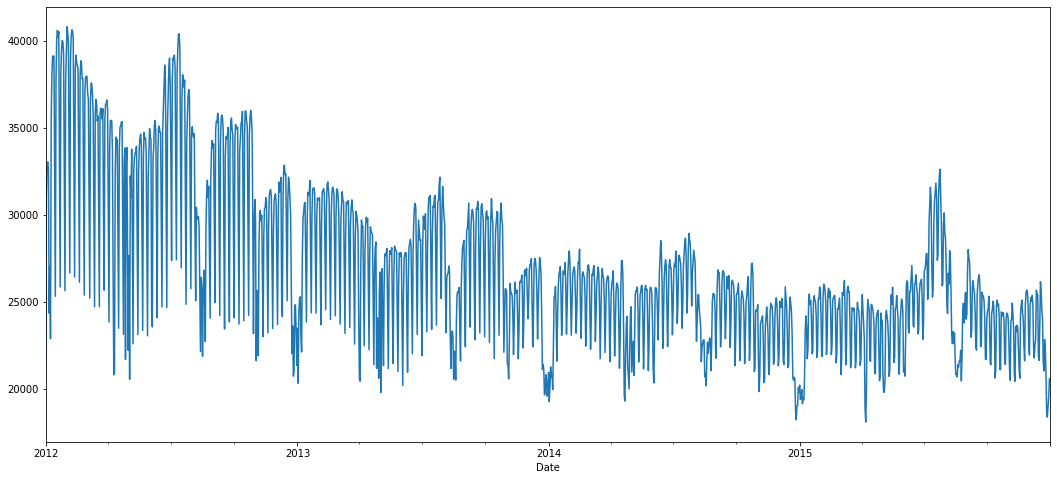

In [135]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from pylab import rcParams

df = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\italia8mattina.csv")
dates = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\date.csv")
df["Date"]=dates["date"]
df = df[["TSTOT.ConsumiITA","Date"]]
df.columns = ['Consumo', 'Date']
df = df.append({'Consumo':37952.91,'Date':'2012-02-29'}, ignore_index = True)
df = df.sort_values(by=['Date']).reindex()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

rcParams['figure.figsize'] = 18, 8
df['Consumo'].dropna().plot()

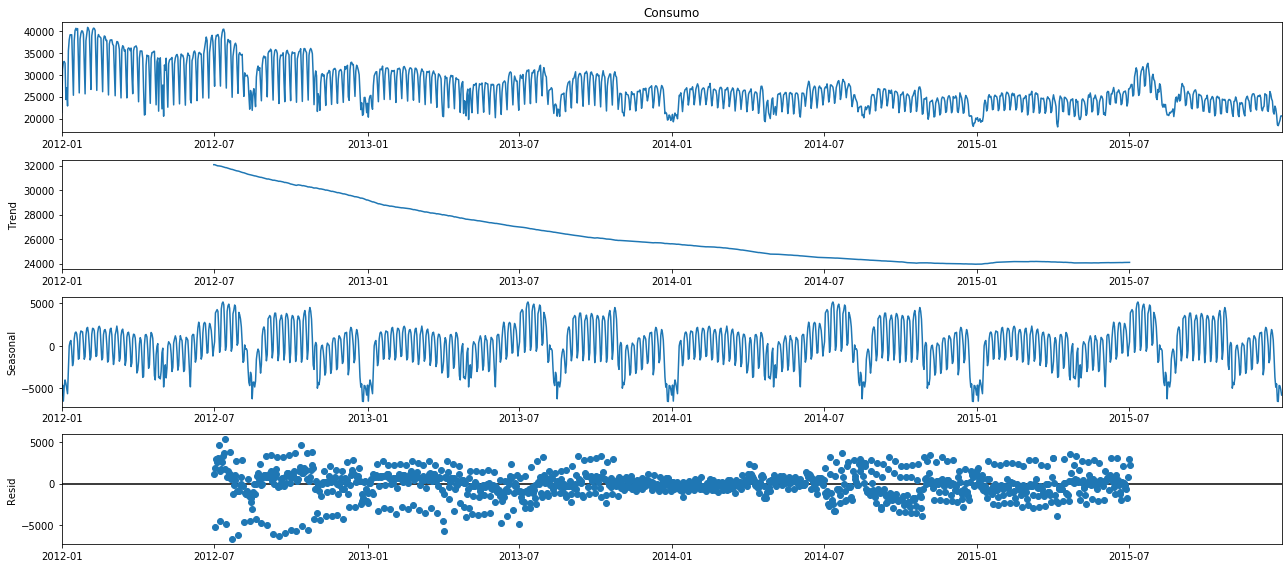

In [136]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df["Consumo"].dropna(),freq=365, model='additive')
fig = decomposition.plot()
plt.show()

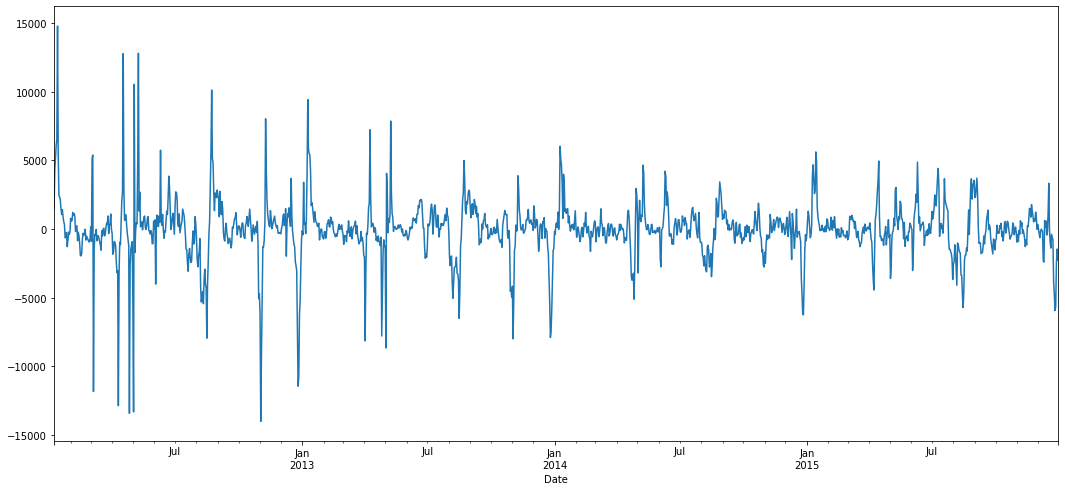

In [217]:
df['Consumo_diff'] =   df['Consumo'] - df['Consumo'].shift(7)
df['Consumo_diff_2'] = df['Consumo'] - df['Consumo'].shift(63)
df['Consumo_diff_tot'] =   df['Consumo_diff'] - df['Consumo_diff'].shift(63)
df['Consumo_diff'].dropna().plot()

In [138]:
import pylab as pl
from numpy import fft
def fourierExtrapolation(x, n_predict,n_harm=1):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = []
    for i in range(n): # This is just to tell you how to create a list.
        indexes.append(i)
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [155]:
x_train = x[:len(x)-100]
x_test = x[len(x)-100:]

1454
1354
100
1461


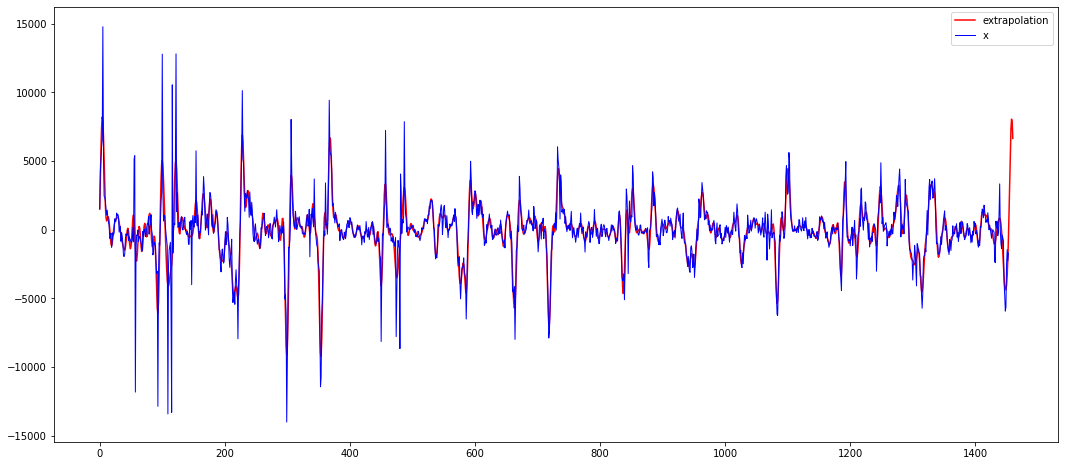

In [139]:
#x = np.array(df['Consumo'])
x = np.array(df['Consumo_diff'].dropna())
n_predict = 100


extrapolation = fourierExtrapolation(x, n_predict,180)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 1)
pl.legend()
pl.show()

In [ ]:
df["Final"] = df["Consumo_diff"]*0
for i in range(7,len(df["Consumo_diff"])):
    df["Final"][i-7] = df["Consumo_diff"][i]#+ print(df["Consumo"][i-7]
j=0
for i in range(len(df["Consumo_diff"])-7,len(df["Consumo_diff"])):
    df["Final"][i] = extrapolation[j]
    j=j+1
df["Final"]= df["Final"]+df["Consumo"]
df[["Consumo","Final"]]


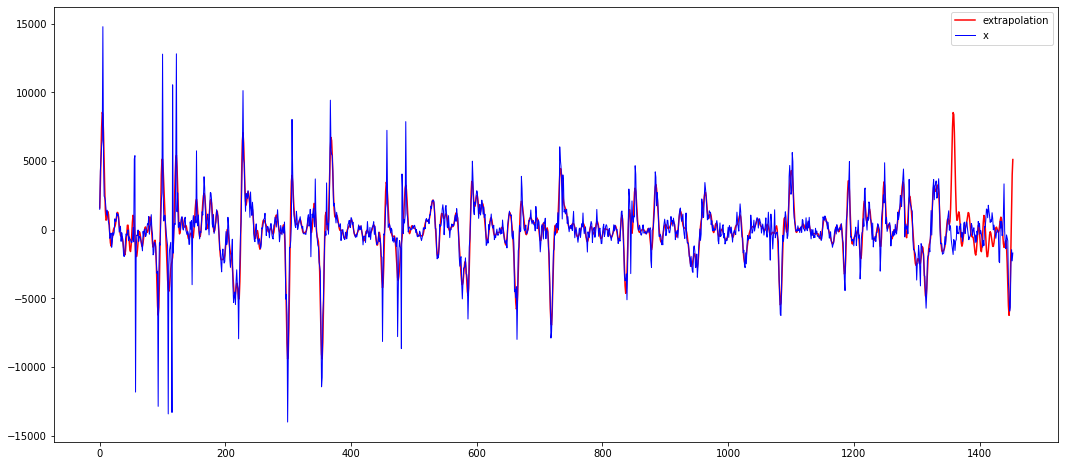

In [168]:
x = np.array(df['Consumo_diff'].dropna())
x_train = x[:len(x)-n_predict]
x_test = x[len(x)-n_predict:]

n_predict = 100

extrapolation = fourierExtrapolation(x_train, n_predict,180)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 1)
pl.legend()
pl.show()

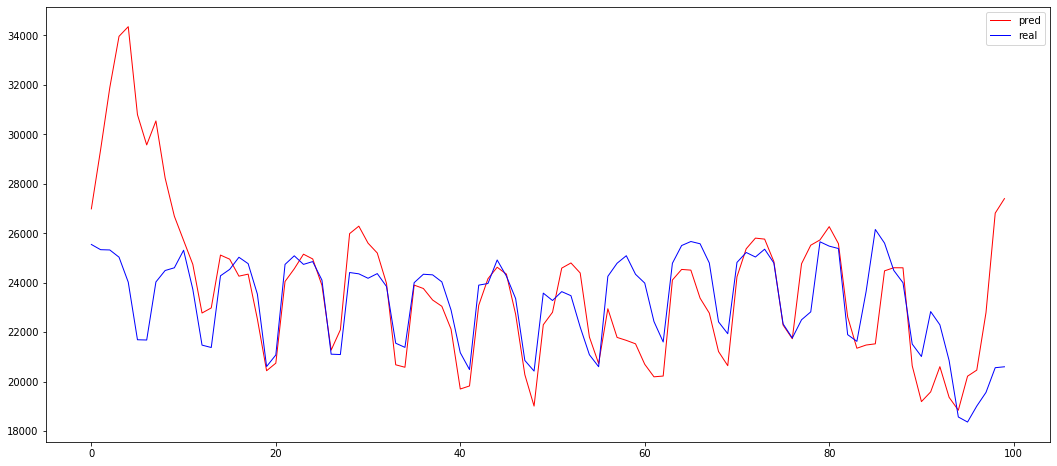

In [216]:
dataset["Consumo"] = df["Consumo"][:1453]
dataset = pd.DataFrame({'real': x, 'pred': extrapolation, 'cons':extrapolation})
for i in range(1454): 
    dataset["cons"][i] = df["Consumo"][i] 
    
dataset["real"] = dataset["real"] + dataset["cons"]
dataset["pred"] = dataset["pred"] + dataset["cons"]
dataset

pred = dataset["pred"][1354:]
real = dataset["real"][1354:]

pred

pl.plot(np.arange(0, pred.size), pred, 'r', label = 'pred', linewidth = 1)
pl.plot(np.arange(0, real.size), real, 'b', label = 'real', linewidth = 1)
pl.legend()
pl.show()